In [1]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 2px  black solid !important;
    padding: 2px  black solid !important;
    margin: 2px  black solid !important;
  color: black !important;
}
</style>

# Project: Investigating the [Medical Appointment No Shows]


### Table of Contents
<ul>
<li><a href="#intro">1) Introduction</a></li>
<li><a href="#quest">2) Questions</a></li>
<li><a href="#wrangling">3) Data Wrangling</a></li>
       <ul>
        <li><a href="#gather">Load packages & gathering data</a></li>
        <li><a href="#assess">Assessing data</a></li>
        <li><a href="#clean">Cleaning and trimming data</a></li>
       </ul>
<li><a href="#eda">4) Exploratory Data Analysis</a></li>
       <ul>
        <li><a href="#rq1">Research Question</a></li>
       </ul>
<li><a href="#conclusions">5) Conclusions</a></li>
<li><a href="#references">6) References</a></li>
</ul>

<a id='intro'></a>
## 1) Introduction <a href="#top"></a>

>  Based on my choice, in this project I’ll analyze the [No-show appointments(original source on Kaggle)](https://www.kaggle.com/joniarroba/noshowappointments/kernels) dataset, it’s a dataset who holds informations about 110.527 medical appointments of different patients from different neighborhoods in Brazil.
<br /> This dataset is built for the purpose of finding out the reasons that made patients not showed up at their scheduled
appointment. Thus, it contains one dependent variable called `No-Show` (which take the ‘No’ cardinality when the patient shows up at the scheduled appointment and ‘Yes’ when he don't show up), and to understand the reasons for this behavior, 13 other variables were collected in parallel with the main information, which is the showing up or not at each medical appointment.




> You can see more details about the 14 data's features in the table below:

| N° 	| Feature        	| Description                                                                                                                                	|
|:----:	|:----------------	|:--------------------------------------------------------------------------------------------------------------------------------------------	|
| 1  	| **PatientId**      	| Identification of a patient                                                                                                                	|
| 2  	| **AppointmentID**  	| The day someone called or registered the appointment, this is before appointment of course.                                                	|
| 3  	| **Gender**         	| Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.                          	|
| 4  	| **ScheduledDay**   	| The day of the actuall appointment, when they have to visit the doctor.                                                                    	|
| 5  	| **AppointmentDay** 	| The day someone called or registered the appointment, this is before appointment of course.                                                	|
| 6  	| **Age**            	| How old is the patient.                                                                                                                    	|
| 7  	| **Neighbourhood**  	| Where the appointment takes place.                                                                                                         	|
| 8  	| **Scholarship**    	| True of False . Observation, this is a broad topic, consider reading this article [here](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia) 	|
| 9  	| **Hipertension**   	| True or False                                                                                                                              	|
| 10 	| **Diabetes**       	| True or False                                                                                                                              	|
| 11 	| **Alcoholism**     	| True or False                                                                                                                              	|
| 12 	| **Handcap**        	| True or False                                                                                                                              	|
| 13 	| **SMS_received**   	| 1 or more messages sent to the patient.                                                                                                    	|
| 14 	| **No-show**        	| 'No' the patient showed up;'Yes' for a no-show                                                                                             	|

<br/>


<a id='quest'></a>
## 2)  Questions <a href="#top"></a>
### Main question:What are the factors that affect the patients attendance?

### Intermediate questions:
* What is the overall rate of patients for both (show up / not show up) at the medical appointment?
* How many patients are female and are male, and what's the proportion of no-showing up at the appointment for each Gender?
* What are the characteristics of patients in terms of age? 
* How many patients  and what's the no-showing rate for each age category?
* How many patients have (a scholarship / don't have it), and what's the proportion of no-showing up at the appointment for each situation?
* How many patients have( hypertension / don't have it), and what's the proportion of no-showing up at the appointment for each situation?
* How many patients are (diabetics / not diabetics), and what's the proportion of no-showing up at the appointment for each situation?

<a id='wrangling'></a>
## 3) Data Wrangling <a href="#top"></a>

> **In this section I'll proceed through three stages:**
* Load packages & gathering data
* Assessing data
* Cleaning and trimming data

<a id='gather'></a>
**1) Loading required libraries & gathering data** <a href="#top"></a>

In [2]:
# import the modules that we need for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [3]:
# loading the 'Medical Appointment No Slows' dataset
df = pd.read_csv('Downloads/data/Patient Appointment project/Medical Appointment No Slows.csv', sep=';' , encoding='utf8')
# data overview
print(df.shape)
df.head()

(110527, 14)


,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.990000e+13,5642903,29/04/2016 20:38,29/04/2016 02:00,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.590000e+14,5642503,29/04/2016 18:08,29/04/2016 02:00,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.260000e+12,5642549,29/04/2016 18:19,29/04/2016 02:00,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.680000e+11,5642828,29/04/2016 19:29,29/04/2016 02:00,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.840000e+12,5642494,29/04/2016 18:07,29/04/2016 02:00,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


 <a id='assess'></a>
 **2) Assessing data** <a href="#top"></a>
  > * In this section I'll try to identify any problems in my data's quality or structure

In [4]:
# take sample on the data 
df.sample(10)

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
45252,9.150000e+12,5678341,10/05/2016 10:22,24/05/2016 02:00,M,68,SANTO ANT?”NIO,0,0,0,0,0,1,No
29503,9.890000e+14,5598648,19/04/2016 09:50,05/05/2016 02:00,F,44,ROM?ƒO,1,0,0,0,0,1,Yes
48093,9.280000e+14,5698519,16/05/2016 09:37,18/05/2016 02:00,F,39,JARDIM DA PENHA,0,0,0,0,0,0,No
83833,2.860000e+12,5705499,17/05/2016 09:14,30/05/2016 02:00,F,35,TABUAZEIRO,0,0,0,0,0,1,No
37027,1.640000e+12,5639038,29/04/2016 10:40,04/05/2016 02:00,F,73,RESIST??NCIA,0,1,0,0,0,1,No
77912,5.350000e+13,5681281,10/05/2016 15:59,19/05/2016 02:00,M,2,BONFIM,0,0,0,0,0,0,No
70997,5.680000e+14,5470391,15/03/2016 12:29,20/05/2016 02:00,F,49,FONTE GRANDE,0,0,0,0,0,0,No
107160,7.190000e+14,5760977,01/06/2016 18:06,01/06/2016 02:00,F,64,ILHA DE SANTA MARIA,0,0,0,0,0,0,No
1774,2.790000e+12,5641564,29/04/2016 15:57,29/04/2016 02:00,F,35,CENTRO,0,0,0,0,0,0,No
11882,5.240000e+11,5692549,12/05/2016 17:39,16/05/2016 02:00,F,49,INHANGUET??,0,0,0,0,0,0,No


In [5]:
# git information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   ScheduledDay    110527 non-null  object 
 3   AppointmentDay  110527 non-null  object 
 4   Gender          110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> **observations:**
* there are some issues in the columns names that should be fixed.
* there are no missed values.
* the data type of `PatientId` should be turned from 'float' to 'int'.
* the data type of `ScheduledDay` and `AppointmentDay` is wrong, it should be turned to 'datetime'.
* the variables ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show] are categorical, so their data type should be as 'category'.

In [6]:
# Describeing data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474961e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560943e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921800e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170000e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.170000e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.440000e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
# test
df.query('Age < 0')

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.660000e+14,5775010,06/06/2016 10:58,06/06/2016 02:00,F,-1,ROM?ƒO,0,0,0,0,0,0,No


In [8]:
# test
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

> **observation:**
* The minimum value of the `age` variable equal -1, less than 0!
* We see that the `Handcap` has values other than 0 and 1 and that doesn't make sence so we drop these

In [9]:
# know the data  duplicated 
df.duplicated().sum()

0

> **observation:**
* there are not duplicate data

In [10]:
# Print Unique Values
df.nunique()

PatientId           6100
AppointmentID     110527
ScheduledDay       28590
AppointmentDay        27
Gender                 2
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

 <a id='clean'></a>
**3) Cleaning data** <a href="#top"></a>
 > **In this section I'll go through the steps below:**
 * Renaming to relevant column names
 * Converting variables to the correct data types
 * Triming data regarding the variables needed in the research questions

In [11]:
# current columns' names
list(df.columns)

['PatientId',
 'AppointmentID',
 'ScheduledDay',
 'AppointmentDay',
 'Gender',
 'Age',
 'Neighbourhood',
 'Scholarship',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received',
 'No-show']

In [12]:
# Rename incorrect columns' names and makes it all a lower case
new_columns = ['patient_id', 'appointment_id',  'scheduled_day','appointment_day',
       'gender','age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'appointment']
df.columns = new_columns
# test
df.head(n=3)

,patient_id,appointment_id,scheduled_day,appointment_day,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,appointment
0,2.990000e+13,5642903,29/04/2016 20:38,29/04/2016 02:00,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.590000e+14,5642503,29/04/2016 18:08,29/04/2016 02:00,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.260000e+12,5642549,29/04/2016 18:19,29/04/2016 02:00,F,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [13]:
# Convert PatientId from Float to Integer
df['patient_id'] = df['patient_id'].astype('int64')
# test
df['patient_id'].dtypes

dtype('int64')

In [14]:
# We see that the handcap has values other than 0 and 1 and that doesn't make sence so we drop these
df = df[df['handicap'] < 2]
# test
df['handicap'].unique()

array([0, 1], dtype=int64)

In [15]:
# convert all the categorical variables from 'int' to 'category' type
df['gender'] = df['gender'].astype('category')
df['scholarship'] = df['scholarship'].astype('category')
df['hypertension'] = df['hypertension'].astype('category')
df['diabetes'] = df['diabetes'].astype('category')
df['alcoholism'] = df['alcoholism'].astype('category')
df['handicap'] = df['handicap'].astype('category')
df['sms_received'] = df['sms_received'].astype('category')
df['appointment'] = df['appointment'].astype('category');
# test
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110328 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   patient_id       110328 non-null  int64   
 1   appointment_id   110328 non-null  int64   
 2   scheduled_day    110328 non-null  object  
 3   appointment_day  110328 non-null  object  
 4   gender           110328 non-null  category
 5   age              110328 non-null  int64   
 6   neighbourhood    110328 non-null  object  
 7   scholarship      110328 non-null  category
 8   hypertension     110328 non-null  category
 9   diabetes         110328 non-null  category
 10  alcoholism       110328 non-null  category
 11  handicap         110328 non-null  category
 12  sms_received     110328 non-null  category
 13  appointment      110328 non-null  category
dtypes: category(8), int64(3), object(3)
memory usage: 6.7+ MB


In [16]:
# Change the data type to a categorical type to facilitate analysis
df['appointment'].cat.rename_categories(['Show','No Show'], inplace = True)
df['gender'].cat.rename_categories(['Female','Male'], inplace = True)
df['scholarship'].cat.rename_categories(['No Scholarship','Scholarship'], inplace = True)
df['hypertension'].cat.rename_categories(['No Hypertension','Hypertension'], inplace = True)
df['diabetes'].cat.rename_categories(['No Diabetes','Diabetes'], inplace = True)
df['alcoholism'].cat.rename_categories(['No Alcoholism' , 'Alcoholism'], inplace = True)
df['handicap'].cat.rename_categories(['No Handicap', 'Handicap'], inplace = True)
df['sms_received'].cat.rename_categories(['No', 'Yes'] , inplace = True)

In [17]:
# test
df.sample(6)

,patient_id,appointment_id,scheduled_day,appointment_day,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,appointment
16518,4200000000000,5648367,02/05/2016 17:32,02/05/2016 02:00,Female,60,MARIA ORTIZ,No Scholarship,No Hypertension,No Diabetes,No Alcoholism,No Handicap,No,Show
39952,419000000000000,5745605,30/05/2016 14:11,30/05/2016 02:00,Female,3,ROM?ƒO,No Scholarship,No Hypertension,No Diabetes,No Alcoholism,No Handicap,No,Show
11794,544000000000000,5666713,06/05/2016 08:56,11/05/2016 02:00,Male,48,SANTO ANDR?‰,No Scholarship,No Hypertension,No Diabetes,No Alcoholism,No Handicap,Yes,Show
10504,97800000000000,5714803,18/05/2016 15:10,30/05/2016 02:00,Male,29,FORTE S?ƒO JO?ƒO,No Scholarship,No Hypertension,No Diabetes,No Alcoholism,No Handicap,Yes,Show
68853,57600000000000,5686396,11/05/2016 15:16,20/05/2016 02:00,Female,40,TABUAZEIRO,Scholarship,No Hypertension,No Diabetes,No Alcoholism,No Handicap,No,Show
59009,40000000000000,5609649,20/04/2016 18:31,02/05/2016 02:00,Female,44,SANTA MARTHA,No Scholarship,No Hypertension,No Diabetes,No Alcoholism,No Handicap,Yes,No Show


In [18]:
# Convert 'scheduled_day' and 'appointment_day' from 'object' type to 'datetime64[ns]'
df['scheduled_day'] = pd.to_datetime(df['scheduled_day']).dt.date.astype('datetime64[ns]')
df['appointment_day'] = pd.to_datetime(df['appointment_day']).dt.date.astype('datetime64[ns]')
# test
df[['scheduled_day', 'appointment_day']].dtypes

scheduled_day      datetime64[ns]
appointment_day    datetime64[ns]
dtype: object

In [19]:
# Row with incorrect age value (-1)
df = df[df['age'] != -1]
# I deleted the line with age = -1 as i assume that is a typo.
# test
np.min(df['age'])

0

In [20]:
# create 'age_category' variable for make the analysis easier
values = [0 , 2 , 17 , 39 , 60 , 116]
category = ['0 - 2','3 - 17','18 - 39','40 - 59', '60 - 115']   
df['age_category'] = pd.cut(df['age'] , bins = values ,labels = category)
# test
df['age_category'].nunique()

5

In [21]:
# Define data related to the required variables in my research questions
df = df.iloc[: , np.r_[4:6 , 7:10 , 13:15]]
# test
df.head()

,gender,age,scholarship,hypertension,diabetes,appointment,age_category
0,Female,62,No Scholarship,Hypertension,No Diabetes,Show,60 - 115
1,Male,56,No Scholarship,No Hypertension,No Diabetes,Show,40 - 59
2,Female,62,No Scholarship,No Hypertension,No Diabetes,Show,60 - 115
3,Female,8,No Scholarship,No Hypertension,No Diabetes,Show,3 - 17
4,Female,56,No Scholarship,Hypertension,Diabetes,Show,40 - 59


<br />
<a id='eda'></a>

## 4) EDA - Exploratory Data Analysis <a href="#top"></a>

> **In this section**: I'll explore the data in order to address may research questions.
* Finding patterns.
* Visualizing relationships.
* Building intuition.


**First** I'm going to create some functions that will make plotting charts easier.

In [22]:
# Create a function to generate a countplot for one categorical variable
# it should provide a dataset as 'df', a name of categorical variable as 'vb' and number of color as 'i'.
def count_plot_one_vb(df, vb , i):
    base_color = sns.color_palette()[i]
    sns.countplot(data = df, x = vb, color = base_color)
    plt.xlabel(vb.upper())
    plt.ylabel('Number of patients \n ')
    plt.title('Number of patients by '+ vb +' \n',fontsize=16)
    # add annotations
    n_points = df.shape[0]
    gen_counts = df[vb].value_counts()
    locs, labels = plt.xticks() # get the current tick locations and labels

    # loop through each pair of locations and labels
    for loc, label in zip(locs, labels):

        # get the text property for the label to get the correct count
        count = gen_counts[label.get_text()]
        pct_string = '{:0.1f}%'.format(100*count/n_points)

        # print the annotation just below the top of the bar
        plt.text(loc, count-8, pct_string, ha = 'center', fontsize=11, color = 'black')
    return 

In [23]:
# Create a funtion with 3 arguments >> (dataframe as 'df', variable 1 as 'vb1' and variable 2 as 'vb2') to generate:
# 1)- a pivot table between the two variables,
# 2)- a rate bar chart with:
# - the first variable as 'vb1' in horizontal axis(x),
# - the second variable as 'vb2' proportion in (y) axis, and show in legend),
# -- this function concerns only categorical variables --
def rate_bar_chart_2vb(df, vb1,vb2):
    """  
    Creates a pivot table between the two variables and a rate bar chart. 
    Parameters:
    - df (Pandas Dataframe): dataframe containing the data
    - vb1: column in the dataframe (categorical)
    - vb2: column in the dataframe(categorical)
    """
    # pivot-table 
    df_by_vb_count = df.pivot_table(index = vb1, columns = vb2, values = 'age', aggfunc = 'count',margins = True)
    #rate bar chart
    df_by_vb = pd.crosstab(df[vb1], df[vb2], normalize = 'index')
    df_by_vb = np.round((df_by_vb * 100), decimals=2)
    ax = df_by_vb.plot.bar(figsize=(10,5));
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);
    ax.set_xticklabels(df_by_vb.index,rotation = 0, fontsize = 15);
    ax.set_title('\n '+ vb2.upper() + ' (%) by ' + df_by_vb.index.name + '\n', fontsize = 15)
    ax.set_xlabel(df_by_vb.index.name.upper(), fontsize = 12)
    ax.set_ylabel('(Percentage %)', fontsize = 12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    rects = ax.patches
    # Add Data Labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 
                height + 2, 
                str(height)+'%', 
                ha='center', 
                va='bottom',
                fontsize = 12)   
    return  df_by_vb_count 

In [24]:
# Create a funtion with 2 arguments >> (datafram as 'df' and binary variable as 'vb') to generate:
# 1)- a pivot table between the appointment variable and the binary variable in arguments,
# 2)- stacked bar chart with:
# - the variable 'vb' in horizontal axis(x),
# - the 'appointment' variable in (y) axis.

def stacked_bar_appointment_with_vb(df, vb):
    # pivot table 'gender' by 'appointment' 
    group_vb_all= df.pivot_table(index = vb, columns = 'appointment', values = 'age', aggfunc = 'count',margins = True)
    
    # plot
    group_vb = pd.pivot_table(df,index = vb, columns = 'appointment', values = 'age',aggfunc = 'count')
    ind = range(len(df[vb].value_counts()))
    width = 0.8
    p1=plt.bar(ind, group_vb.Show, width)
    p2 = plt.bar(ind, group_vb['No Show'], width)
    plt.legend(['Show','No Show'])
    plt.xticks(ind, group_vb.index)
    plt.ylabel('Number of patients')
    plt.title('Number of patients (Show/No Show) appointment by ' + vb + '\n ', fontsize=16)
    
    return group_vb_all

__1.What is the overall rate of patients for both (show up / not show up) at the medical appointment?__

In [25]:
# number of patients grouping by 'appointment' variable
count_app = df.groupby('appointment')['appointment'].count()
sum_app = count_app.sum()
print(count_app)
print('total appointment:',sum_app)
print((count_app[0]/sum_app)*100, '%'  )
print((count_app[1]/sum_app)*100, '%'  )

appointment
Show       88049
No Show    22278
Name: appointment, dtype: int64
total appointment: 110327
79.80730011692513 %
20.19269988307486 %


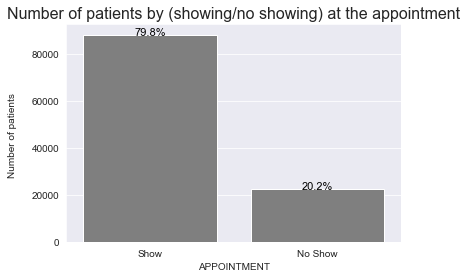

In [26]:
# apointment plot
count_plot_one_vb(df, 'appointment',7)
plt.title('Number of patients by (showing/no showing) at the appointment',fontsize=16);

> **notes:**
* It is noted in the graph that the number of patients who show up at their appointments is much greater than those who not show up.
* 79.8% of the total patients showed up at their appointments.
* 20.2% of the total patients not showed up at their appointments.

__2.How many patients are female and are male, and what's the proportion of no-showing up at the appointment for each Gender?__

In [27]:
# number of patients grouping by 'gender' variable
count_gender = df.groupby('gender')['gender'].count()
sum_gender = count_gender.sum()
print(count_app)
print('total gender:',sum_gender)
print((count_gender[0]/sum_gender)*100, '%'  )
print((count_gender[1]/sum_gender)*100, '%'  )

appointment
Show       88049
No Show    22278
Name: appointment, dtype: int64
total gender: 110327
65.01581661787232 %
34.984183382127675 %


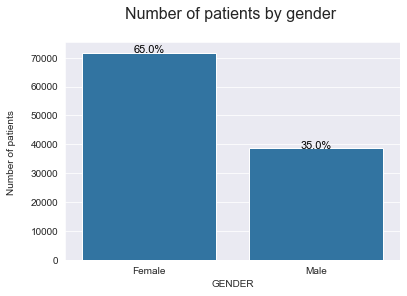

In [28]:
# gender count plot
count_plot_one_vb(df, 'gender',0)

> **observations:**
* It is noted in the graph that the number of female is much greater than male.
* 65% of total patients are females.
* 35% of total patients are males.

appointment,Show,No Show,All
gender,,,
Female,57162,14568,71730
Male,30887,7710,38597
All,88049,22278,110327


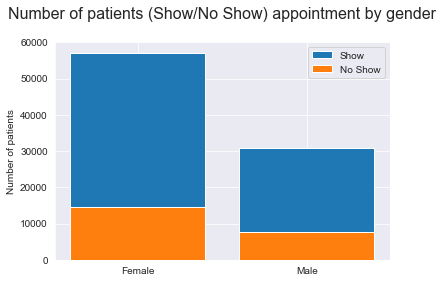

In [29]:
# stacked bar chart 'appointment' by Gender
stacked_bar_appointment_with_vb(df, 'gender')

appointment,Show,No Show,All
gender,,,
Female,57162,14568,71730
Male,30887,7710,38597
All,88049,22278,110327


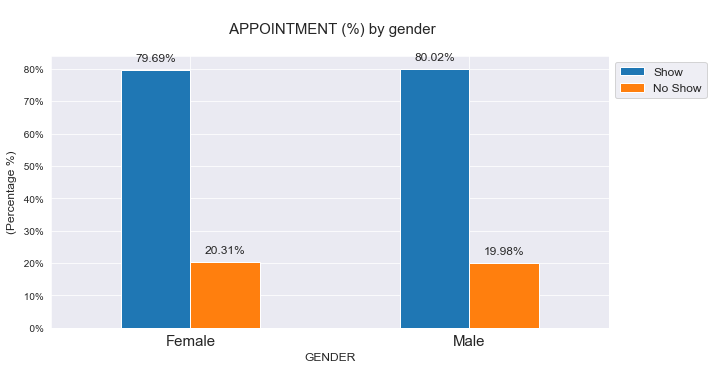

In [30]:
# bar chart comparison femal and mal by 'appointment' variable.
rate_bar_chart_2vb(df, 'gender', 'appointment')

> **notes:** <br />
let's focus on the no show rates for (`female` and `male`) because it's the matter of our study 
* for the females, we have `14568` patients who not showed up at their appointments, which makes `20.31%` of all females (`71730`).
* for the males, we have `7710` patients who not showed up at their appointments, which makes `19.98%` of all males (`38597`).
* there is only **`0.33%`** difference between females and males no showing up rate.
* from my analytical point of view, there is no significant effect of `Gender` on patients not showing up for their medical appointments.

__3.What are the characteristics of patients in terms of age?__

In [31]:
# unique values
print(df.age.nunique())
np.sort(df.age.unique())

103


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115],
      dtype=int64)

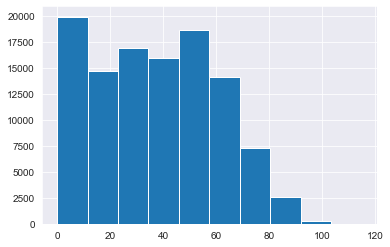

In [32]:
# simple histogram of 'age' variable
df['age'].hist(bins=10);

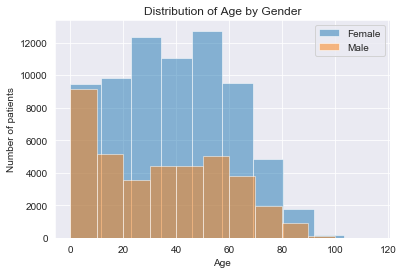

In [33]:
# create two dataframes frames one for 'female' and another for 'male'
female = df[df.gender == 'Female']
male = df[df.gender == 'Male']
# histogram for each Gender
female.age.hist(label='Female', alpha=0.5, bins=10)
male.age.hist(label='Male', alpha=0.5, bins=10)
plt.ylabel('Number of patients')
plt.xlabel('Age')
plt.title('Distribution of Age by Gender')
plt.legend();

> **observation:**
* there are `103` different ages.
* the most frequent age is `0`, i assume there are a babies.
* the distribution of males' age is almost same than femals' age, however the number of females is much more than males.

__4. How many patients and what's the-no showing rate for each age category?__

In [34]:
# number of patients grouping by 'age_category' variable
count_category = df.groupby('age_category')['age_category'].count()
sum_category = count_category.sum()
print(count_category)
print((count_category[0]/sum_category)*100, '%')
print((count_category[1]/sum_category)*100, '%')
print((count_category[2]/sum_category)*100, '%')
print((count_category[3]/sum_category)*100, '%')
print((count_category[4]/sum_category)*100, '%')

age_category
0 - 2        3891
3 - 17      19906
18 - 39     31859
40 - 59     31441
60 - 115    19691
Name: age_category, dtype: int64
3.6436678278458254 %
18.640671236468517 %
29.83387646552047 %
29.44244671685957 %
18.439337753305615 %


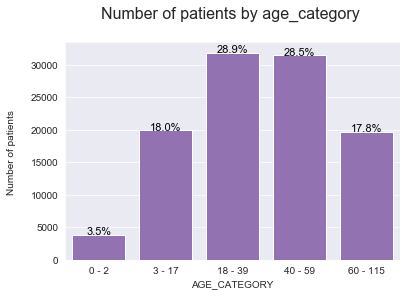

In [35]:
# bar plot with proportion age category
count_plot_one_vb(df,'age_category',4)

> **observations:**
according to this bar chart of age category, we notice that:
* the two categories ([`18 - 39`] and [`40 - 59`]) are the most frequent,
* the category of babies ([`0 - 2`]) is the least frequent.

appointment,Show,No Show,All
age_category,,,
0 - 2,3224,667,3891
3 - 17,15222,4684,19906
18 - 39,24441,7418,31859
40 - 59,25559,5882,31441
60 - 115,16703,2988,19691
All,85149,21639,106788


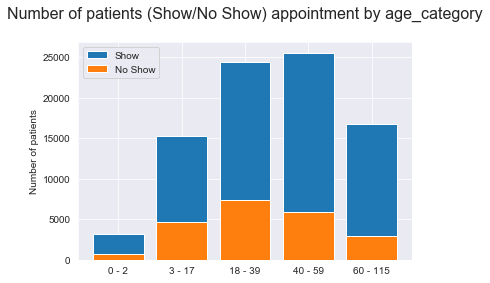

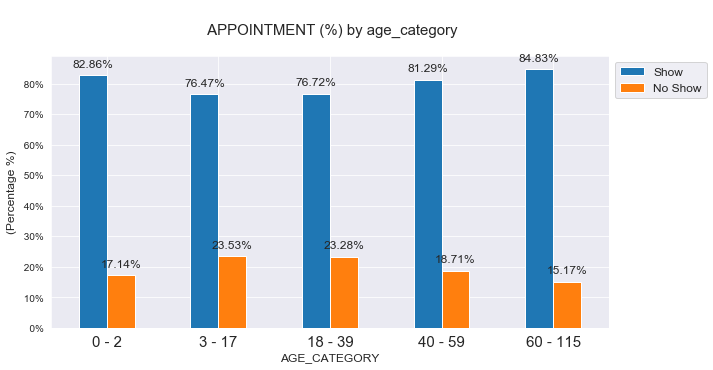

In [36]:
# stacked bar chart 'appointment' by age_category 
stacked_bar_appointment_with_vb(df, 'age_category')
# bar chart comparison proportion of (show/no show) by 'age_category' variable.
rate_bar_chart_2vb(df, 'age_category', 'appointment')

> **notes:** <br />
let's focus on the no show rates for each age category because it's the matter of our study  
* for the [**`0 - 2`**] category, we have `667` patients who not showed up at their appointments, which makes **`17.14%`** of all patients of this category (`3891`).
<br />
* for the [**`3 - 17`**] category, we have `4684` patients who not showed up at their appointments, which makes **`23.53%`** of all patients of this category (`19906`).
<br />
* for the [**`18 - 39`**] category, we have `7418` patients who not showed up at their appointments, which makes **`23.28%`** of all patients of this category (`31859`).
<br />
* for the [**`40 - 59`**] category, we have `5882` patients who not showed up at their appointments, which makes **`18.71%`** of all patients of this category (`31441`).
<br />
* for the [**`60 - 115`**] category, we have `2988` patients who not showed up at their appointments, which makes **`15.17%`** of all patients of this category (`19691`).
<br />
* the highest rates of no-showing are (**`23.28%`** and **`18.71%`**) which belong respectively to the categories ([**`3 - 17`**] and [**`18 - 39`**]
* from my analytical point of view, there is an effect of `age` on the patients no-showing rate.

gender,Female,Male,All
age_category,,,
0 - 2,1845,2046,3891
3 - 17,10315,9591,19906
18 - 39,23046,8813,31859
40 - 59,21564,9877,31441
60 - 115,13239,6452,19691
All,70009,36779,106788


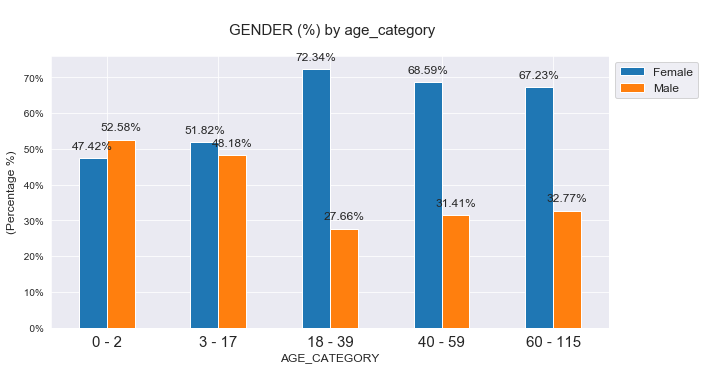

In [37]:
# bar chart comparison proportion of (Female/Male) by 'age_category' variable.
rate_bar_chart_2vb(df, 'age_category', 'gender')

> **notes:** 
* in the first two categories we have the number of females is almost equal to the number of males,
* in the three least categories the number of females is almost twice the number of males.

__5.How many patients have (a scholarship / don't have it), and what's the proportion of no-showing up at the appointment for each situation?__

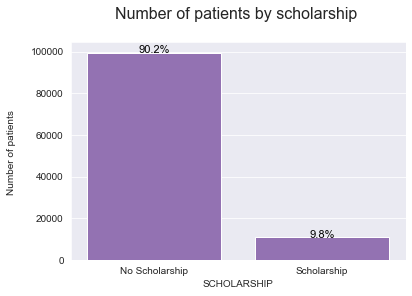

In [38]:
# scholarship count plot
count_plot_one_vb(df, 'scholarship',4)

appointment,Show,No Show,All
scholarship,,,
No Scholarship,79783,19701,99484
Scholarship,8266,2577,10843
All,88049,22278,110327


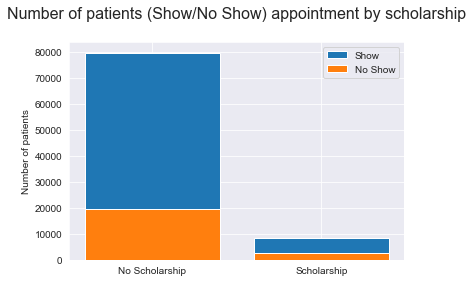

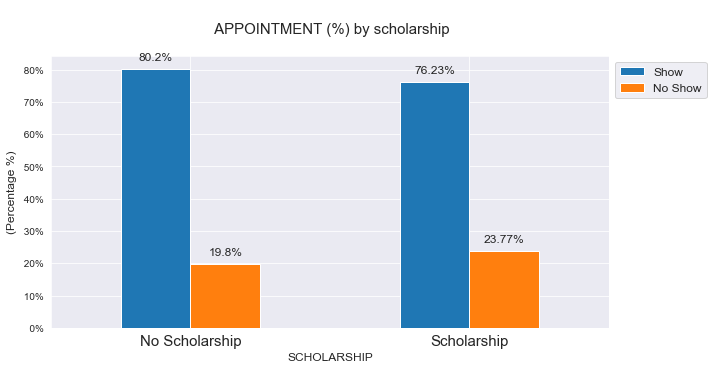

In [39]:
# stacked bar chart 'appointment' by Scholarship 
stacked_bar_appointment_with_vb(df, 'scholarship')
# bar chart comparison the proportion of (show/no show) by 'scholarship' variable.
rate_bar_chart_2vb(df, 'scholarship', 'appointment')

> **notes:** <br />
let's focus on the no show rates because it's the matter of our study 
* for the patients who have a scholarship, we have `2577` patients who not showed up at their appointments, which makes `23,77%` of all `10843` patients,
* for the patients who haven't a scholarship, we have `19701` patients who not showed up at their appointments, which makes `19.8%` of all `99484` patients,
* It seems to be given a scholarship may contribute to increasing the no showing rate.

__6. How many patients have( hypertension / don't have it), and what's the proportion of no-showing up at the appointment for each situation?__

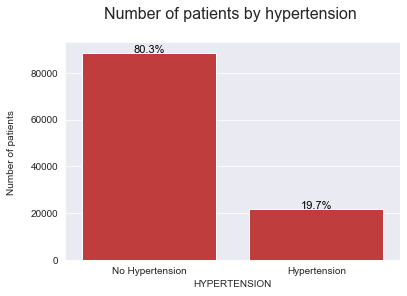

In [40]:
# hypertension count plot
count_plot_one_vb(df, 'hypertension',3)

appointment,Show,No Show,All
hypertension,,,
No Hypertension,70081,18530,88611
Hypertension,17968,3748,21716
All,88049,22278,110327


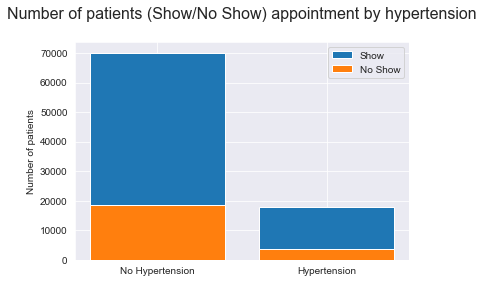

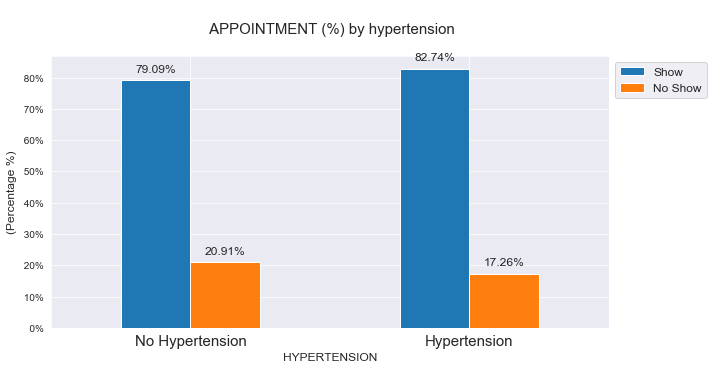

In [41]:
# stacked bar chart 'appointment' by hypertension 
stacked_bar_appointment_with_vb(df, 'hypertension')
# bar chart comparison the proportion of (show/no show) by 'hypertension' variable.
rate_bar_chart_2vb(df, 'hypertension','appointment')

> **notes:** <br />
let's focus on the no show rates because it's the matter of our study
* for the patients who have an hypertension, we have `3748` patients who not showed up at their appointments, which makes `17.26%` of all `21716` patients,
* for the patients who haven't an hypertension, we have `18530` patients who not showed up at their appointments, which makes `20.91%` of all `88611` patients,
* the no showing rate of the patients having an hypertension is less than those who haven't an hypertension.
* It seems to have an hypertension may contribute to decreasing the no showing rate.

__7. How many patients are (diabetics / not diabetics), and what's the proportion of no-showing up at the appointment for each situation?__

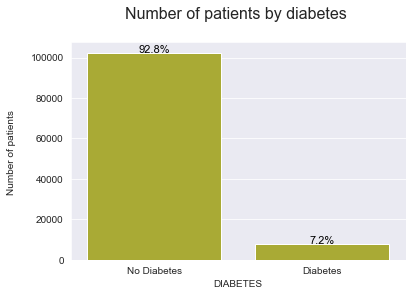

In [42]:
# diabetes count plot
count_plot_one_vb(df, 'diabetes',8)

appointment,Show,No Show,All
diabetes,,,
No Diabetes,81571,20856,102427
Diabetes,6478,1422,7900
All,88049,22278,110327


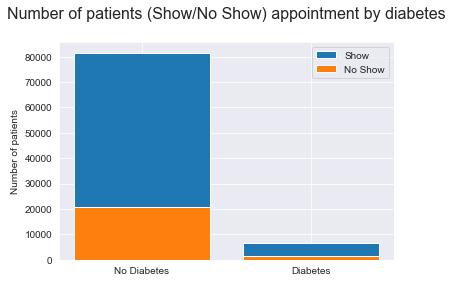

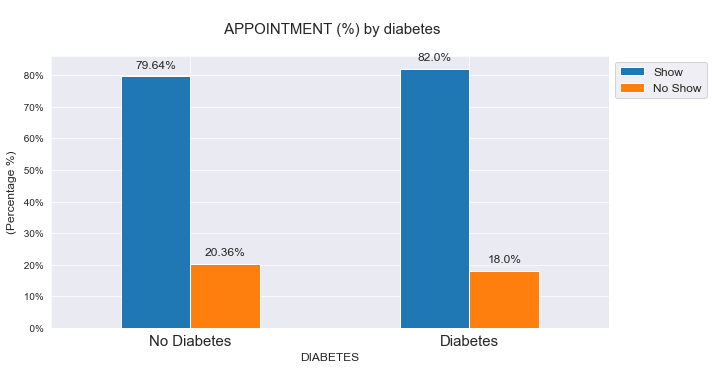

In [43]:
# stacked bar chart 'appointment' by diabetes 
stacked_bar_appointment_with_vb(df, 'diabetes')
# bar chart comparison the proportion of (show/no show) by 'diabetes' variable.
rate_bar_chart_2vb(df, 'diabetes','appointment')

> **notes:** <br />
let's focus on the no show rates  
* for the patients who have a diabetes, we have `1422` patients who not showed up at their appointments, which makes `18%` of all `7900` patients,
* for the patients who haven't a diabetes, we have `20856` patients who not showed up at their appointments, which makes `20.36%` of all `102427` patients,
* the no showing rate of the patients having a diabetes is less than those who haven't a diabetes.
* It seems to have a diabetes may contribute to decreasing the no showing rate.

<a id='conclusions'></a>
## Conclusions <a href="#top"></a>

> As mentioned in the introduction, this study remains descriptive and limited to only 6 variables, and in no way provides real and precise explanations for The reasons why patients do not showed up for their scheduled medical appointments because there are any inferential statistics included, however it indicates some factors that may cause this behavior.

> **After analyzing these 6 variables, we reach the results below**:
* The overall no-showing rate is `20.2%`, less than the overall show-up rate (`79.8%`).
* The percentage of females is greater than males _ `65% > 35%`.
* From the age `0 to 17`, the number of females is almost equal to the number of males,
* From the age `18 to 115`, the number of females is almost twice the number of males.
* There is no significant effect of gender on no-showing rate (20% for each gender).
* The most frequent age categories are [`3 - 17`])and ([`18 - 39`] which they mark the highest rates of no-showing `23.5%` for both.
* There is an effect of `age` on the patients no-showing rate.
* The percentage of having a scholarship is much less than not having a scholarship _ `9.8% < 90.2%`.
* The percentage of having an hypertension is much less than not having an hypertension _ `19.7% < 80.3%`.
* The percentage of the diabetic patients is much less than the non-diabetic patients _ `7.2% < 92.8%` are s
* The data provided is not sufficient to confirm the answer to the research question, and this study remains descriptive because it is limited to only 6 variables, so we need an inference statistic or a machine learning model.
* The volume of sample is not good for making a good judgment about research questions

<a id='references'></a>
## References  <a href="#top"></a>
* https://pandas.pydata.org/
* https://numpy.org/
* https://matplotlib.org/
* https://seaborn.pydata.org/
* https://www.kaggle.com/
* https://classroom.udacity.com/nanodegrees/
* https://stackoverflow.com/
* https://stackexchange.com/
* https://daringfireball.net/projects/markdown/syntax#list
* https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia